# Business Case: Scaler - Clustering

    
 

```Problem Statement```

```Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the```
```best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these ```
```clusters should have similar characteristics.```






                    

---

## PROJECT STARTS HERE

---

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt 

In [3]:
df = pd.read_csv('scaler_clustering.csv')
df1 = pd.read_csv('scaler_clustering.csv')

In [4]:
df3 = pd.read_csv('scaler_clustering.csv')

In [5]:
# dropping unnecessery columns

df = df.drop('Unnamed: 0',axis=1)
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
# data shape

df.shape

(205810, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205810 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205766 non-null  object 
 1   email_hash        205810 non-null  object 
 2   orgyear           205724 non-null  float64
 3   ctc               205810 non-null  int64  
 4   job_position      153263 non-null  object 
 5   ctc_updated_year  205810 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [8]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52547
ctc_updated_year        0
dtype: int64

In [9]:
df.describe(include = np.number, percentiles=[.25,.5,.75,.90,.95, .99, .999]).round(2).T.astype(int)

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.9%,max
orgyear,205724,2014,63,0,2013,2016,2018,2019,2020,2021,2023,20165
ctc,205810,2271853,11801845,2,530000,950000,1700000,2800000,3800000,12600000,200000000,1000150000
ctc_updated_year,205810,2019,1,2015,2019,2020,2021,2021,2021,2021,2021,2021


In [10]:
df.describe(include=object)

,company_hash,email_hash,job_position
count,205766,205810,153263
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43546


In [11]:
# missing values imputation

df['job_position'] = df['job_position'].fillna('Other')
df1['job_position'] = df1['job_position'].fillna('other')

In [12]:
# dropping rows of NaN values from columns like company_hash, orgyear 

df = df.dropna(axis = 0, how= 'any', 
               subset = ['company_hash','orgyear'])

In [13]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [14]:
# cardinality check for catagorical and continious features 

df.email_hash.nunique(),df.company_hash.nunique(), df.job_position.nunique(), df.ctc.nunique()

(153333, 37274, 1017, 3359)

In [15]:
# changing datatype from float to int 
df['orgyear'] = df['orgyear'].astype(int)
df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)
df['ctc'] = df['ctc'].astype(int)

# capping data excluding top 2 % data i.e. outlier capping
df = df[df['orgyear']<=2022]

In [16]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019


In [17]:
top20_userjobp = df.groupby([
    'email_hash', 'job_position'
])['ctc'].unique().str[0].sort_values(ascending=False).reset_index()

In [18]:
top20_userjobp.head()

,email_hash,job_position,ctc
0,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,Other,1000150000
1,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,Other,255555555
2,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,Other,250000000
3,82fbacc015757ee74efe763c3623dc751812af48c741ff...,Data Analyst,200000000
4,d6d921d5a6f8979ffbe72ddad6f77a138e6ba8ea09c888...,Backend Engineer,200000000


In [19]:
x = top20_userjobp['job_position'][:15].values
y = top20_userjobp['ctc'][:15].values
z = top20_userjobp.email_hash[:15].values

In [20]:
top20_userctc = df.groupby([
    'email_hash', 'job_position', 'company_hash'
])['ctc'].unique().str[0].sort_values(ascending=False).head(500).reset_index()

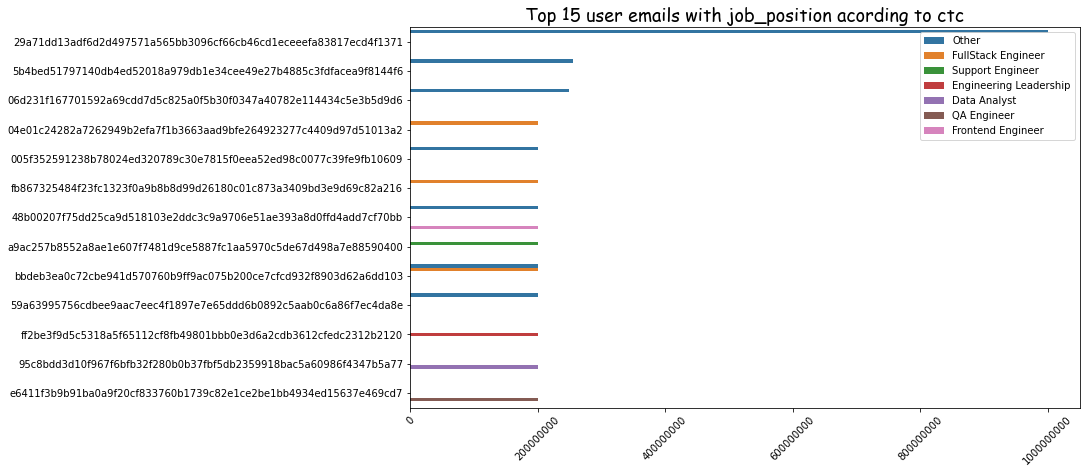

In [21]:
x = top20_userctc['job_position'][:15].values
y = top20_userctc['ctc'][:15].values
z = top20_userctc.email_hash[:15].values



plt.figure(figsize=(12,7))
sns.barplot(y=z,x=y,hue=x)
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=True,style='plain',axis='X')
plt.title(
'Top 15 user emails with job_position acording to ctc',
fontsize=18,
fontname='Comic Sans MS')
plt.legend( loc='upper right')
plt.show()


## OBSERVATIONS 1:



- Observations are made on the basis of ***ctc***.



- Top most user with email hash ***29a71dd13adf6d2d497571a565bb3096cf66cb46cd1eceeefa83817ecd4f1371*** earns a total of 100cr which is nearly 3x of other top 9 users.


- From th mentoned job position Fullstack Engineer seems to be the top most job position.



- From the mentioned job positions in top 10 earning users FullStack Engineer seems to be most frequent.

----




In [22]:
top20_userctc.head()

,email_hash,job_position,company_hash,ctc
0,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,Other,whmxw rgsxwo uqxcvnt rxbxnta,1000150000
1,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,Other,obvqnuqxdwgb,255555555
2,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,Other,aveegaxr xzntqzvnxgzvr hzxctqoxnj,250000000
3,04e01c24282a7262949b2efa7f1b3663aad9bfe2649232...,FullStack Engineer,lubgqsvz wyvot wg,200000000
4,005f352591238b78024ed320789c30e7815f0eea52ed98...,Other,vbvkgz wvzvav,200000000


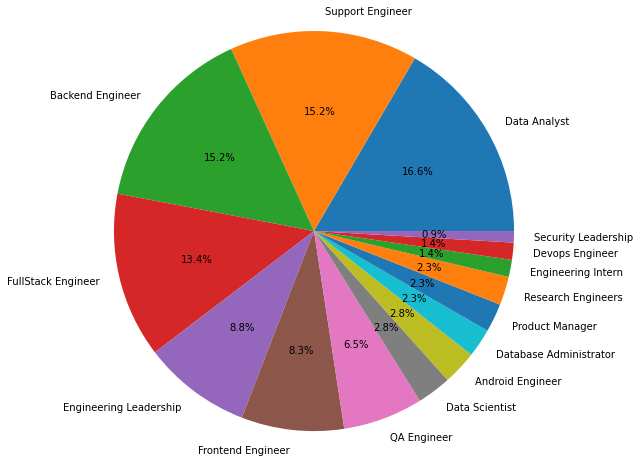

In [23]:
product_val = (top20_userctc[top20_userctc['job_position'] != 'Other']
               ['job_position'].value_counts(normalize=True) * 100).values
product_name = (top20_userctc[top20_userctc['job_position'] != 'Other']
                ['job_position'].value_counts(normalize=True) * 100).index

# plt.figure(figsize=(12, 5))
plt.pie(product_val[:15],
        labels=product_name[:15],
        autopct='%1.1f%%',
        radius=2.3)
plt.show()

###                 ***FIG : 15 TOP MOST FREQUENT JOB POSITION WITH HIGHEST CTC***
---

## OBSERVATION 2:


- Observations are made on the basis of ***ctc***.



-  From top 15 job positions ***Data Analyst*** seems to be the most appeared role with 16.6% followed by ***support engineer*** 15.5% , ***backend engineer*** 15.2% and ***fullstack engineer*** 13.4%.


-  Top 6 most occuring job positions comprise 75% of the total data.




----

In [24]:
df = df.drop(['email_hash'],axis=1)

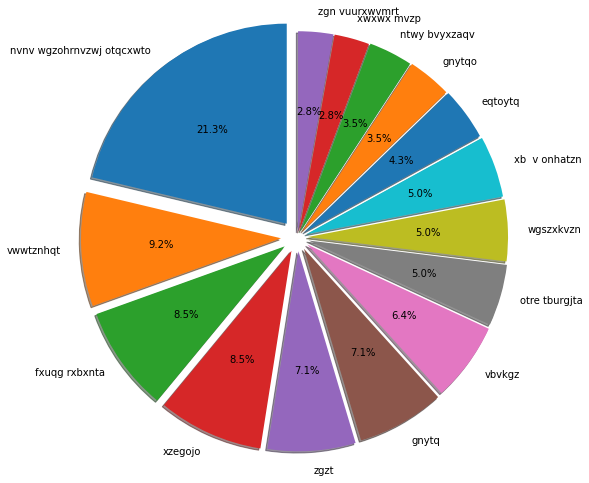

In [25]:
product_val = (top20_userctc[top20_userctc['company_hash'] != 'Other']
               ['company_hash'].value_counts(normalize=True) * 100).values
product_name = (top20_userctc[top20_userctc['company_hash'] != 'Other']
                ['company_hash'].value_counts(normalize=True) * 100).index



explode = (0.2, 0.19, .18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.07)
fig1, ax1 = plt.subplots()
ax1.pie(product_val[:15],
        explode=explode,
        labels=product_name[:15],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        radius=2.3)
''' Equal aspect ratio ensures that pie is drawn as a circle'''
# ax1.axis('tight')
# plt.tight_layout()
plt.show()

###                                      ***FIG : 15 TOP MOST FREQUENT COMPANIES WITH HIGHEST CTC***
---

## OBSERVATION 3 :


- Observations are made on the basis of ***ctc***.


- ***nvnv wgzohrnvzwj otqcxwto*** is the most occuring company in top 15 top companies with total of 21.3%  and it is followed by ***vwwtznhqt*** 9.2% , ***fxuqg rxbxnta*** 8.5% and ***xzegojo*** 8.5%.



-  Top 6 companies comprise of total 60% of the overall data.




----

### Creating years experience features in below cell
---

In [26]:
import datetime
     
# using now() to get current time
current_time = datetime.datetime.now()
     

df['exp_year'] = ( current_time.year - df['orgyear'] ).astype(int)


df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,exp_year
0,atrgxnnt xzaxv,2016,1100000,Other,2020,7
1,qtrxvzwt xzegwgbb rxbxnta,2018,449999,FullStack Engineer,2019,5
2,ojzwnvwnxw vx,2015,2000000,Backend Engineer,2020,8
3,ngpgutaxv,2017,700000,Backend Engineer,2019,6
4,qxen sqghu,2017,1400000,FullStack Engineer,2019,6


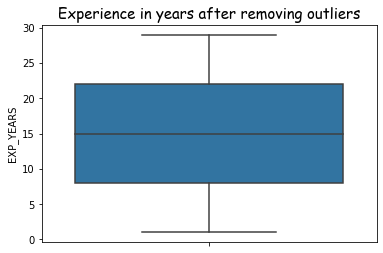

In [27]:
y = df.exp_year.value_counts().index < 30
sns.boxplot(y=df.exp_year.value_counts().index[y])
plt.ylabel('EXP_YEARS')
plt.title(
'Experience in years after removing outliers',
fontsize=15,
fontname='Comic Sans MS')
plt.show()

## OBSERVATION 4:



- Median experience years comes out to be 15 after removing the outliers.



- Quartile 1 comes out to be nearly 9.



- Quartile 3 comes out to be nearly 21.



---

---
## Preprocessing using RegEX

In [28]:
import re
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

#pre-processing Job Positions column using regex
print(f'Unique Job Positions before preprocessing: {df1.job_position.nunique()}')
df1.job_position=df1.job_position.apply(lambda x: preprocess_string(str(x)))
df1.drop_duplicates(keep='last', inplace = True)
print(f'Unique Job Positions after preprocessing: {df1.job_position.nunique()}')

Unique Job Positions before preprocessing: 1018
Unique Job Positions after preprocessing: 856


In [29]:

#pre-processing company_hash column using regex
print(f'Unique company_hash before preprocessing: {df1.company_hash.nunique()}')
df1.company_hash=df1.company_hash.apply(lambda x: preprocess_string(str(x)))
df1.drop_duplicates(keep='last', inplace = True)
print(f'Unique company_hash after preprocessing: {df1.company_hash.nunique()}')

Unique company_hash before preprocessing: 37299
Unique company_hash after preprocessing: 37208


## Preprocessing using RegEX ends
---

In [30]:
df1.drop_duplicates(inplace=True)
df1.drop(['Unnamed: 0','email_hash'],axis=1,inplace=True)
df1.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0


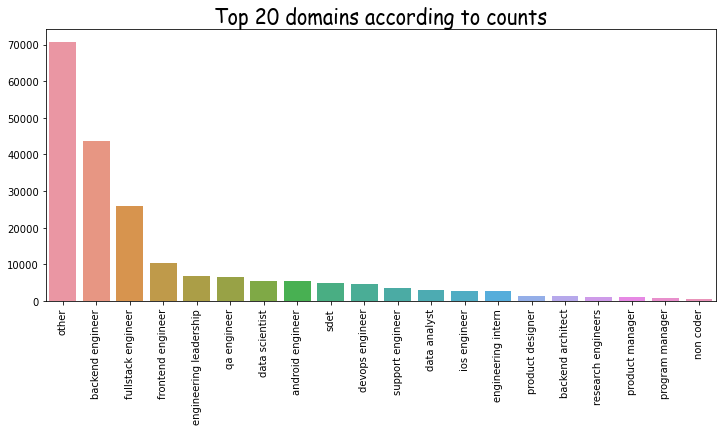

In [31]:
x = df1.job_position.value_counts().head(20).index
y = df1.job_position.value_counts().head(20).values

plt.figure(figsize=(12,5))
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.title(
'Top 20 domains according to counts',
fontsize=20,
fontname='Comic Sans MS')
plt.show()

## OBSERVATIONS 5:


- All the observations are made on the basis of counts.



- Most frequently occuring job positions excluding ***others*** comes out to be ***backend engineer*** followed by ***fullstack engineer***, ***frontend engineer***, ***engineering leadership***.



- Among top 20 occuring job positions non-coding domain is the least occuring domain of all.


----

## Label Encoding of catagorical variables 

---

In [32]:
c_hash = df.groupby('company_hash')['ctc'].mean().astype(int).reset_index()
c_hash = c_hash.sort_values(by='ctc')
c_hash.head()

,company_hash,ctc
32729,xm,15
25014,uqvpqxnx voogwxvnto,24
6669,ftm ongqt,25
26639,vcvzn sqghu,300
24740,uqgmrtb ogrcxzs,500


In [33]:
lst = []
chk = 0
c = 1
for i in c_hash['ctc']:
    if i != chk:
        lst.append(c)
        c+=1
        chk = i
    elif i == chk:
        lst.append(c-1)
        
        

In [34]:
c_hash['company_hash_lenc'] = lst

In [35]:
job_p = df.groupby('job_position')['ctc'].mean().astype(int).reset_index()
job_p = job_p.sort_values(by='ctc')
job_p.head()

,job_position,ctc
435,New graduate,2000
914,Technical consultant,2000
290,Full-stack web developer,7500
342,Junior consultant,10000
36,Any technical,10000


In [36]:
lst1 = []
chk = 0
c = 1
for i in job_p['ctc']:
    if i != chk:
        lst1.append(c)
        c+=1
        chk = i
    elif i == chk:
        lst1.append(c-1)
        
        

In [37]:
job_p['job_pos_lenc'] = lst1

In [38]:
ch_jp = df.groupby(['company_hash','job_position'])['ctc'].mean().reset_index()

In [39]:
ch_jp = ch_jp.sort_values(by='ctc')

In [40]:
lst2 = []
chk = 0
c = 1
for i in ch_jp['ctc']:
    if i != chk:
        lst2.append(c)
        c+=1
        chk = i
    elif i == chk:
        lst2.append(c-1)
        
        

In [41]:
ch_jp['chash_jpos'] = lst2

In [42]:
ch_jp.head()

,company_hash,job_position,ctc,chash_jpos
59567,xm,Other,15.5,1
45371,uqvpqxnx voogwxvnto,Other,24.0,2
12196,ftm ongqt,Android Engineer,25.0,3
48451,vcvzn sqghu,Database Administrator,300.0,4
44935,uqgmrtb ogrcxzs,Co-founder,500.0,5


In [43]:
df = df.rename(columns={'ctc':'ctc_main'})

In [44]:
df = df.merge(c_hash,on='company_hash')
df = df.merge(job_p,on='job_position')
df = df.merge(ch_jp,on=['company_hash','job_position'])

## Label Encoding of catagorical variables ends here
---

In [45]:
df.head()

,company_hash,orgyear,ctc_main,job_position,ctc_updated_year,exp_year,ctc_x,company_hash_lenc,ctc_y,job_pos_lenc,ctc,chash_jpos
0,atrgxnnt xzaxv,2016,1100000,Other,2020,7,1115666,2238,2484692,317,1.085000e+06,2790
1,atrgxnnt xzaxv,2014,1070000,Other,2018,9,1115666,2238,2484692,317,1.085000e+06,2790
2,qtrxvzwt xzegwgbb rxbxnta,2020,1100000,Other,2021,3,2197333,4081,2484692,317,1.068956e+06,2733
3,qtrxvzwt xzegwgbb rxbxnta,2007,450000,Other,2021,16,2197333,4081,2484692,317,1.068956e+06,2733
4,qtrxvzwt xzegwgbb rxbxnta,2016,800000,Other,2021,7,2197333,4081,2484692,317,1.068956e+06,2733


In [46]:
# removing catagorical variables and duplicates for model

df = df[['orgyear','ctc_main','ctc_updated_year','exp_year','company_hash_lenc','job_pos_lenc','chash_jpos']]
df2 = df.loc[:,~df.columns.duplicated()]

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205342 entries, 0 to 205341
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   orgyear            205342 non-null  int32
 1   ctc_main           205342 non-null  int32
 2   ctc_updated_year   205342 non-null  int32
 3   exp_year           205342 non-null  int32
 4   company_hash_lenc  205342 non-null  int64
 5   job_pos_lenc       205342 non-null  int64
 6   chash_jpos         205342 non-null  int64
dtypes: int32(4), int64(3)
memory usage: 9.4 MB


In [48]:
# Removing outliers of all the features 


def outlier_remover(a, df):
    q1 = a.quantile(.25)
    q3 = a.quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr

    return df.loc[(a >= minn) & (a <= maxx)]


for i in df2.columns:
    df2 = outlier_remover(df2[i], df2)

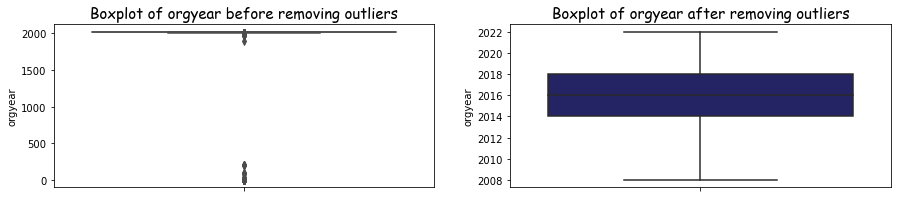

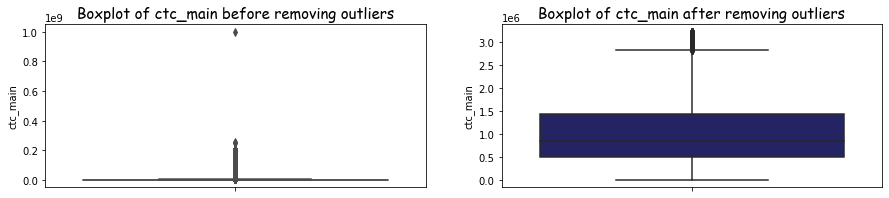

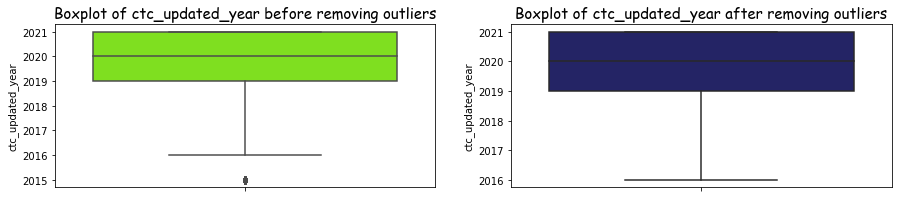

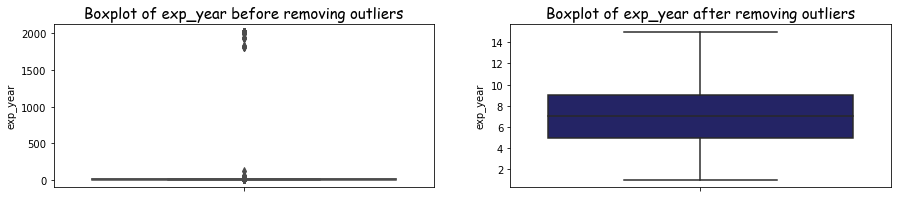

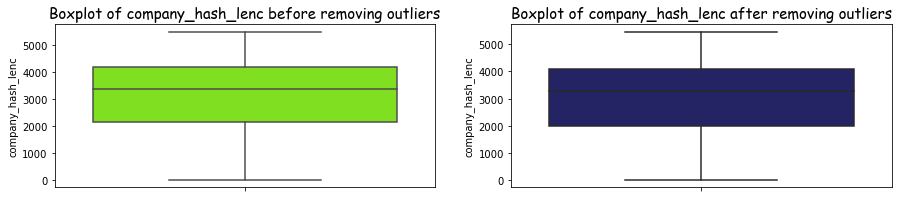

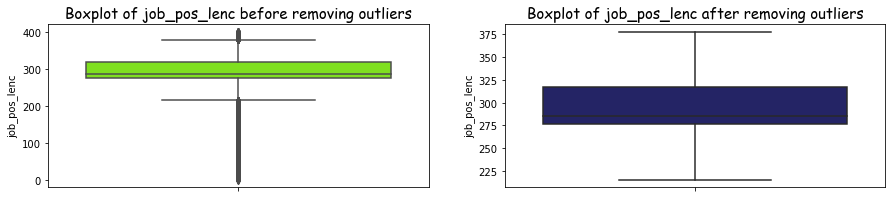

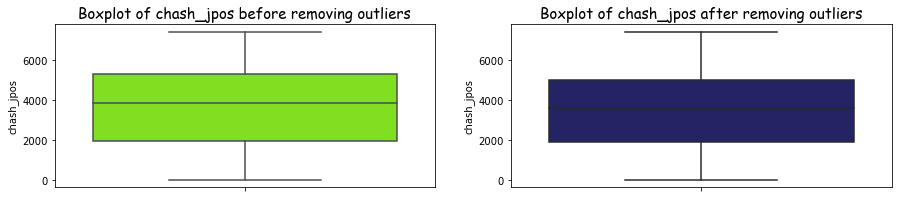

In [49]:
# Comparison between outliers and non-outliers plot

for i in df2.columns:
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    sns.boxplot(y=df[i], color='chartreuse')
    plt.title(f"Boxplot of {i} before removing outliers",
              fontsize=15,
              fontname='Comic Sans MS')
    plt.subplot(122)
    sns.boxplot(y=df2[i], color='midnightblue')
    plt.title(f"Boxplot of {i} after removing outliers",
              fontsize=15,
              fontname='Comic Sans MS')
    plt.show()

## Plot showcasing before and after removing outliers
----
---

In [50]:
# Bootstrapping 

exp_year = [df2.exp_year.sample(105342,replace=True).mean()for i in range(10000)]

ctc_main = [df2.ctc_main.sample(105342,replace=True).mean()for i in range(10000)]

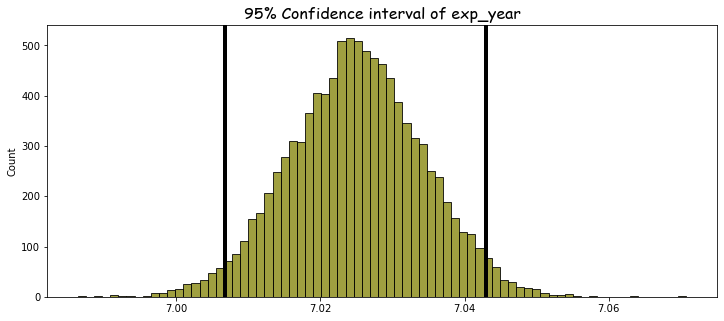

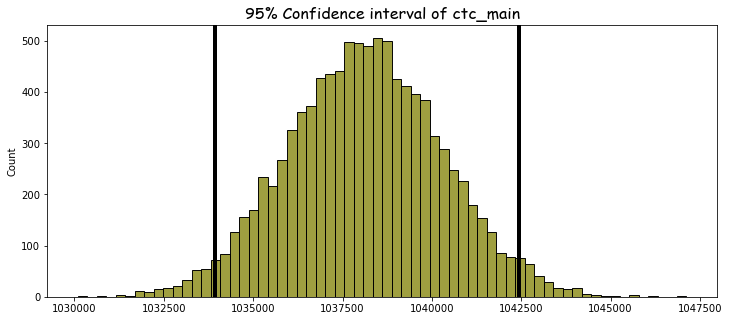

In [51]:
# Plotting 95% confidence level for exp_year and ctc


plt.figure(figsize=(12,5))
sns.histplot(exp_year,color='olive')
plt.title(
'95% Confidence interval of exp_year',
fontsize=16,
fontname='Comic Sans MS')
plt.axvline(np.percentile(exp_year,97.5),color='black',lw=4)
plt.axvline(np.percentile(exp_year,2.5),color='black',lw=4)
plt.ticklabel_format(useOffset=True,style='plain',axis='X')
plt.show()


plt.figure(figsize=(12,5))
sns.histplot(ctc_main,color='olive')
plt.title(
'95% Confidence interval of ctc_main',
fontsize=16,
fontname='Comic Sans MS')
plt.axvline(np.percentile(ctc_main,97.5),color='black',lw=4)
plt.axvline(np.percentile(ctc_main,2.5),color='black',lw=4)
plt.ticklabel_format(useOffset=True,style='plain',axis='X')
plt.show()

## OBSERVATIONS 6:



- According to 95% confidence interval, most prcentage of probability in experience year seems to be 7.3 years.



- According to 95% confidence interval, most prcentage of probability in ctc seems to be ₹ 1038000.

----

In [52]:
df2.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos
0,2016,1100000,2020,7,2238,317,2790
1,2014,1070000,2018,9,2238,317,2790
2,2020,1100000,2021,3,4081,317,2733
4,2016,800000,2021,7,4081,317,2733
5,2016,250000,2021,7,4081,317,2733


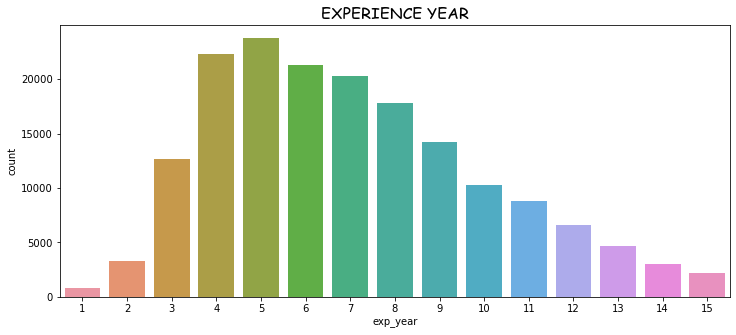

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(df2.exp_year)
plt.title(
'EXPERIENCE YEAR',
fontsize=16,
fontname='Comic Sans MS')
plt.show()

## OBSERVATIONS 7:


- Above 20000 users have 5 years of experience which is most of all.



- Users having 1 years of experience are the least occuring ones.

---
## Preparing data , scaling and feeding it to KMeans Module
---

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)
x = scaler.transform(df2)

In [55]:
from sklearn.cluster import KMeans
k = [KMeans(n_clusters=i,random_state=42).fit(x) for i in range(1,10)]

In [56]:
kmeans_per_k = k[1:]

In [57]:
inertia = [i.inertia_ for i in k]

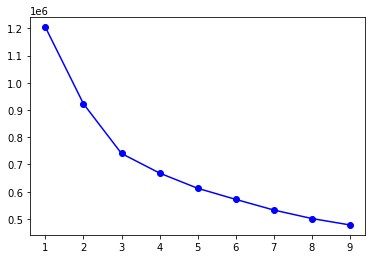

In [58]:
plt.plot(range(1,10),inertia,'bo-')

In [59]:
k = 3
clstr = KMeans(n_clusters=k)

In [60]:
y_pred = clstr.fit_predict(x)

In [61]:
y_pred

array([2, 1, 0, ..., 1, 1, 0])

In [62]:
clstr.cluster_centers_

array([[ 0.6512323 , -0.00923153,  0.25648028, -0.6512323 ,  0.63561333,
         0.23205316,  0.62926586],
       [-1.17406168,  0.74079304, -0.41685884,  1.17406168,  0.39322246,
        -0.14072117,  0.40819643],
       [ 0.24612935, -0.6175349 ,  0.05832639, -0.24612935, -1.06488134,
        -0.14771552, -1.07027408]])

In [63]:

df_mod = pd.DataFrame(x,columns=df.columns)
df_mod['clusters'] = clstr.labels_

In [64]:
df_mod.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,clusters
0,0.008319,0.088316,0.215821,-0.008319,-0.566903,0.726382,-0.372600,2
1,-0.655704,0.045511,-1.441661,0.655704,-0.566903,0.726382,-0.372600,1
2,1.336363,0.088316,1.044561,-1.336363,0.839500,0.726382,-0.403018,0
3,0.008319,-0.339730,1.044561,-0.008319,0.839500,0.726382,-0.403018,0
4,0.008319,-1.124480,1.044561,-0.008319,0.839500,0.726382,-0.403018,0


### Clusters on the basis of company_name, job_position, experience_year
---

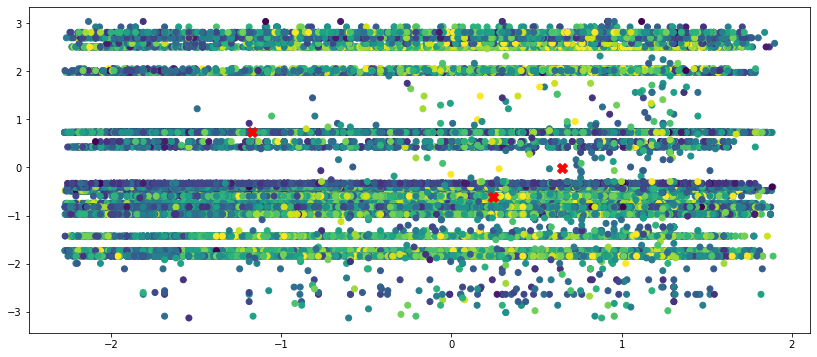

In [65]:

plt.figure(figsize=(14,6))
plt.scatter(df_mod['company_hash_lenc'],df_mod['job_pos_lenc'],c=df_mod['exp_year'])
plt.scatter(clstr.cluster_centers_[:,0],clstr.cluster_centers_[:,1],color='red',marker='X',s=100)
plt.show()

In [66]:
df_mod.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,clusters
0,0.008319,0.088316,0.215821,-0.008319,-0.566903,0.726382,-0.372600,2
1,-0.655704,0.045511,-1.441661,0.655704,-0.566903,0.726382,-0.372600,1
2,1.336363,0.088316,1.044561,-1.336363,0.839500,0.726382,-0.403018,0
3,0.008319,-0.339730,1.044561,-0.008319,0.839500,0.726382,-0.403018,0
4,0.008319,-1.124480,1.044561,-0.008319,0.839500,0.726382,-0.403018,0


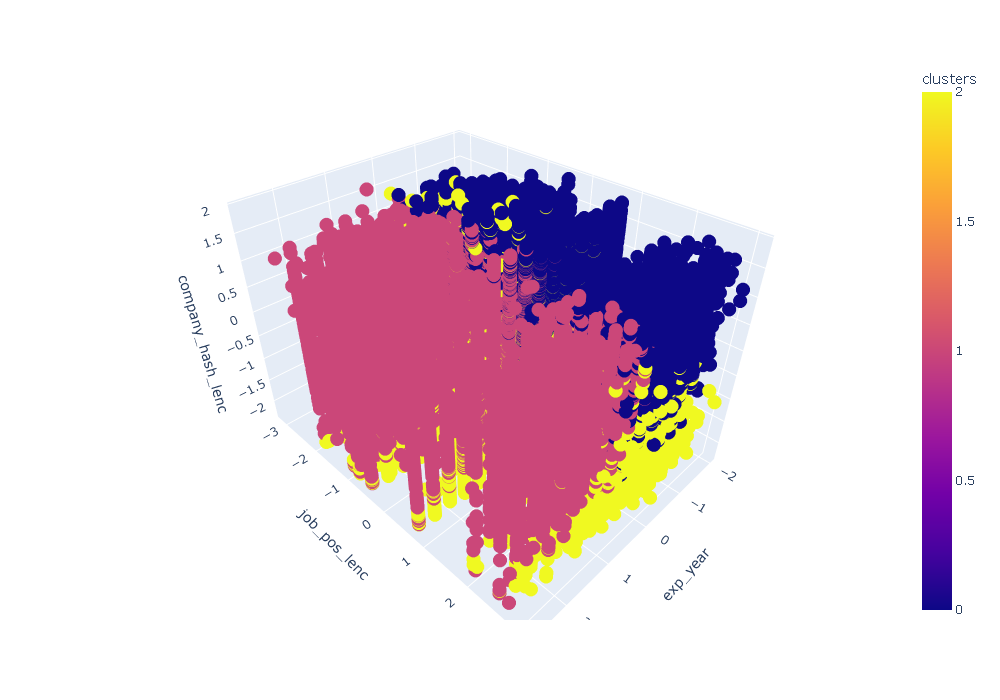

In [67]:
import plotly.express as px

fig = px.scatter_3d(df_mod,
                    x='exp_year',
                    y='job_pos_lenc',
                    z='company_hash_lenc',
                    color='clusters',
                    width=1000,
                    height=700)
fig.write_image('image.png')
from IPython.display import Image

Image('image.png')

###                                      ***FIG : Clusters between CTC, Job_Position and Company_hash***
---


----

## Preparing data for polar plot 

In [69]:
df_mod.groupby('clusters').mean().reset_index()

,clusters,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos
0,0,0.651472,-0.009109,0.256598,-0.651472,0.636099,0.232712,0.630127
1,1,-1.174077,0.741999,-0.417053,1.174077,0.394486,-0.140722,0.409575
2,2,0.245234,-0.616912,0.058218,-0.245234,-1.063353,-0.148016,-1.069259


In [70]:
polar = df_mod.groupby('clusters').mean().reset_index()
polar = pd.melt(polar,id_vars=['clusters'])

In [71]:
polar.head()

,clusters,variable,value
0,0,orgyear,0.651472
1,1,orgyear,-1.174077
2,2,orgyear,0.245234
3,0,ctc_main,-0.009109
4,1,ctc_main,0.741999


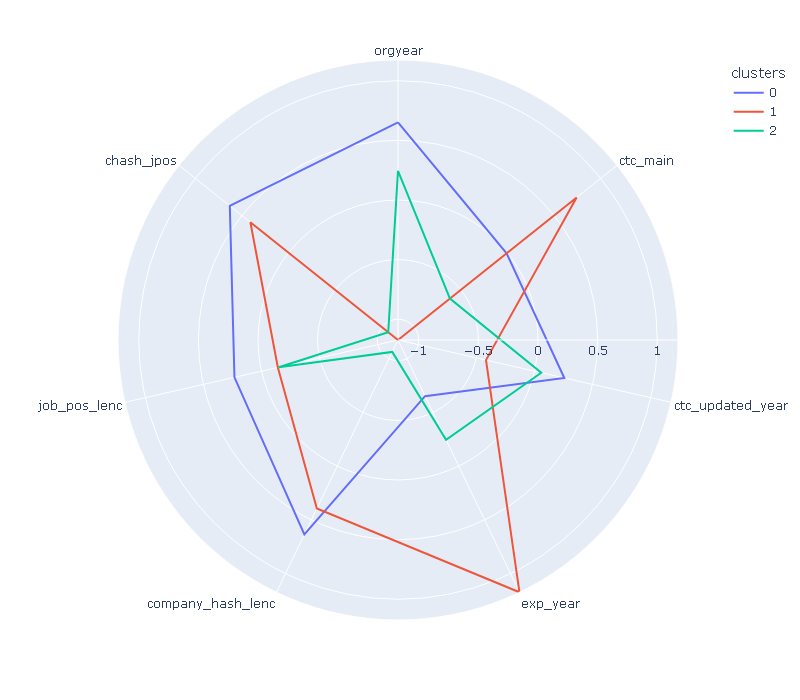

In [72]:
import plotly.express as px
fig = px.line_polar(polar,r='value',theta='variable',color='clusters',line_close=True,height=700,width=800)
fig.write_image('image.png')
from IPython.display import Image
Image('image.png')

###         ***FIG: Polar Plot 1***
---
---

## OBSERVATION 8:



- From ***cluster 0*** we can notice that with the increase of exp_years ctc_main , company_hash and job_position also increased without the increase of update year. Means top class users directly switched with a high salary hike.






- From ***cluster 1*** we can notice that users that joined at high org_year i.e. recently(2020 for example)  have low experience years , ctc and are joined in poor company as well, So they are the ***potential targets*** of scaler as they can be upskilled to higher salary levels or average salary levels.






- From ***cluster 2*** we can observe that users that joined at high org_year i.e. recently(2020 for example)  have low experience years and average ctc with fairly good job_position and company, they can also be the ***right target*** for scaler as they also need to be upskilled to reach the top tier salary levels.


----




---





---

### 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience in below cells
---

In [76]:
def segment(a, b_50, b_75):
    if a >= b_75: return 1
    elif a >= b_50: return 2
    else: return 3

In [77]:
a = df.groupby(['job_pos_lenc','company_hash_lenc','exp_year'])['ctc_main'].describe()

In [78]:
b = df.merge(a, how = 'left', on = ['company_hash_lenc','job_pos_lenc','exp_year'])

In [79]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,count,mean,std,min,25%,50%,75%,max
0,2016,1100000,2020,7,2238,317,2790,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,2014,1070000,2018,9,2238,317,2790,1.0,1.070000e+06,NaN,1070000.0,1070000.0,1070000.0,1070000.0,1070000.0
2,2020,1100000,2021,3,4081,317,2733,12.0,8.533333e+05,5.072983e+05,300000.0,425000.0,825000.0,1100000.0,1800000.0
3,2007,450000,2021,16,4081,317,2733,2.0,1.490000e+06,1.470782e+06,450000.0,970000.0,1490000.0,2010000.0,2530000.0
4,2016,800000,2021,7,4081,317,2733,13.0,6.969231e+05,3.045046e+05,250000.0,450000.0,700000.0,900000.0,1300000.0


In [80]:
b['designation'] = b.apply(lambda x: segment(x['ctc_main'],x['50%'],x['75%']),axis=1)
b.drop(['count','mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)

In [81]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation
0,2016,1100000,2020,7,2238,317,2790,1
1,2014,1070000,2018,9,2238,317,2790,1
2,2020,1100000,2021,3,4081,317,2733,1
3,2007,450000,2021,16,4081,317,2733,3
4,2016,800000,2021,7,4081,317,2733,2


In [82]:
a1 = df.groupby(['job_pos_lenc','company_hash_lenc'])['ctc_main'].describe()

In [83]:
b = b.merge(a1,how='left',on=['job_pos_lenc','company_hash_lenc'])

In [84]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,count,mean,std,min,25%,50%,75%,max
0,2016,1100000,2020,7,2238,317,2790,1,2.0,1.085000e+06,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,2014,1070000,2018,9,2238,317,2790,1,2.0,1.085000e+06,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
2,2020,1100000,2021,3,4081,317,2733,1,137.0,1.068956e+06,931201.348011,20000.0,500000.0,770000.0,1400000.0,7000000.0
3,2007,450000,2021,16,4081,317,2733,3,137.0,1.068956e+06,931201.348011,20000.0,500000.0,770000.0,1400000.0,7000000.0
4,2016,800000,2021,7,4081,317,2733,2,137.0,1.068956e+06,931201.348011,20000.0,500000.0,770000.0,1400000.0,7000000.0


In [85]:
b['class'] = b.apply(lambda x: segment(x['ctc_main'],x['50%'],x['75%']),axis=1)
b.drop(['count','mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)

In [86]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class
0,2016,1100000,2020,7,2238,317,2790,1,1
1,2014,1070000,2018,9,2238,317,2790,1,3
2,2020,1100000,2021,3,4081,317,2733,1,2
3,2007,450000,2021,16,4081,317,2733,3,3
4,2016,800000,2021,7,4081,317,2733,2,2


In [87]:
a2 = df.groupby('company_hash_lenc')['ctc_main'].describe()

In [88]:
b = b.merge(a2,how='left',on='company_hash_lenc')

In [89]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,count,mean,std,min,25%,50%,75%,max
0,2016,1100000,2020,7,2238,317,2790,1,1,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,2014,1070000,2018,9,2238,317,2790,1,3,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
2,2020,1100000,2021,3,4081,317,2733,1,2,428.0,2.197334e+06,1.185536e+07,10000.0,600000.0,900000.0,1688750.0,200000000.0
3,2007,450000,2021,16,4081,317,2733,3,3,428.0,2.197334e+06,1.185536e+07,10000.0,600000.0,900000.0,1688750.0,200000000.0
4,2016,800000,2021,7,4081,317,2733,2,2,428.0,2.197334e+06,1.185536e+07,10000.0,600000.0,900000.0,1688750.0,200000000.0


In [90]:
b['tier'] = b.apply(lambda x: segment(x['ctc_main'],x['50%'],x['75%']),axis=1)
b.drop(['count','mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)

In [91]:
b.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier
0,2016,1100000,2020,7,2238,317,2790,1,1,2
1,2014,1070000,2018,9,2238,317,2790,1,3,2
2,2020,1100000,2021,3,4081,317,2733,1,2,2
3,2007,450000,2021,16,4081,317,2733,3,3,3
4,2016,800000,2021,7,4081,317,2733,2,2,3


In [92]:
c = b.copy()

In [93]:
scaler = StandardScaler()
scaler = scaler.fit_transform(b)

In [94]:
b_scaled= pd.DataFrame(scaler, columns=b.columns, index=b.index)
b_scaled.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier
0,0.045227,-0.098674,0.281493,-0.045227,-0.642206,0.61175,-0.448601,-0.752937,-1.006144,-0.005446
1,-0.023763,-0.101233,-1.227389,0.023763,-0.642206,0.61175,-0.448601,-0.752937,1.221677,-0.005446
2,0.183207,-0.098674,1.035933,-0.183207,0.751608,0.61175,-0.477915,-0.752937,0.107766,-0.005446
3,-0.265227,-0.154132,1.035933,0.265227,0.751608,0.61175,-0.477915,1.558860,1.221677,1.117295
4,0.045227,-0.124270,1.035933,-0.045227,0.751608,0.61175,-0.477915,0.402962,0.107766,1.117295


---
## Manual Clustering 
---

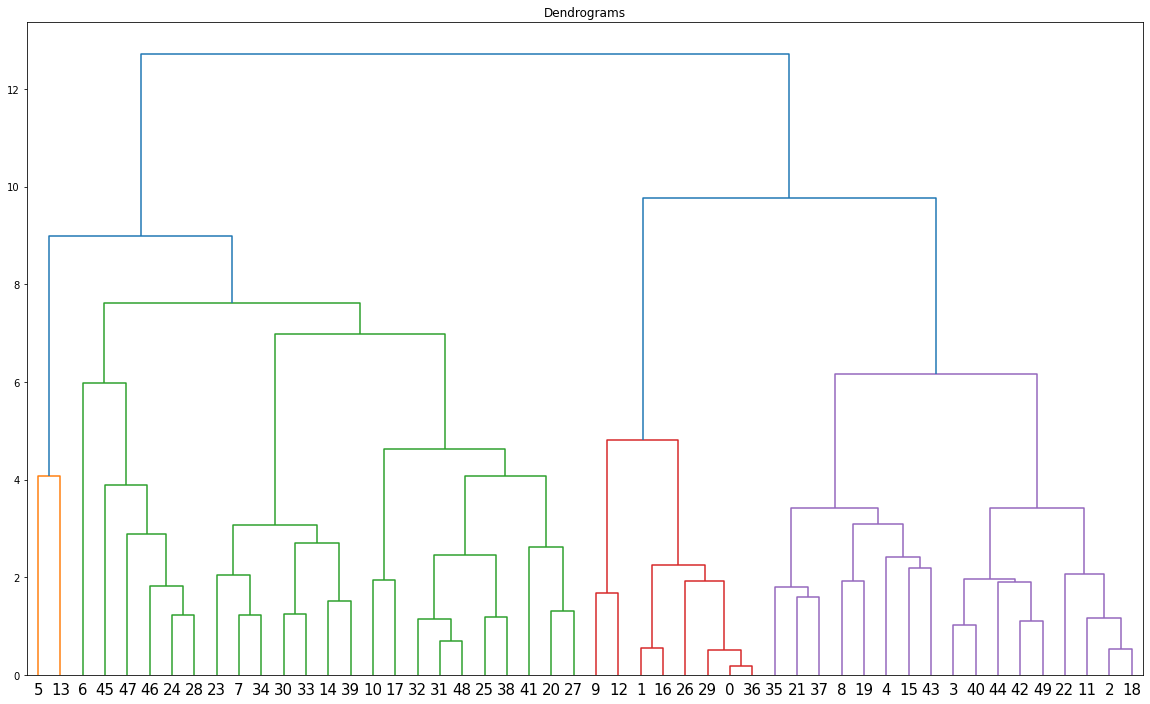

In [95]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b_scaled.sample(50), method='ward'))
plt.xticks(fontsize=15,rotation=0)
plt.show()

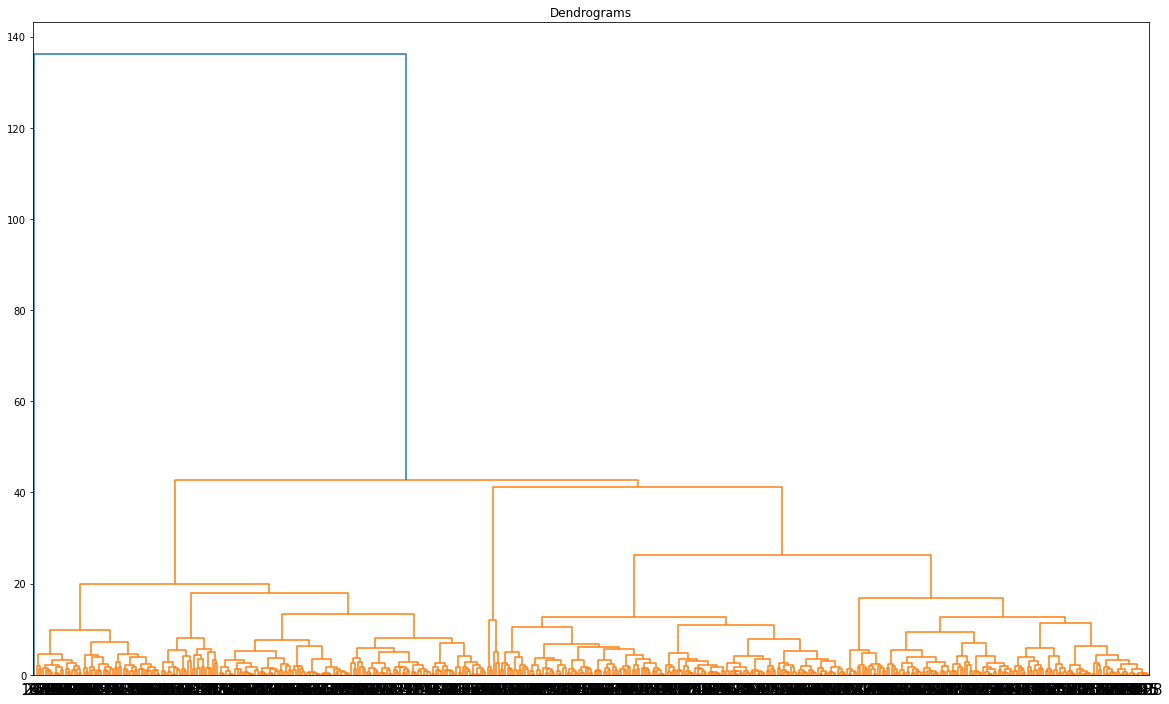

In [96]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b_scaled.sample(500), method='ward'))
plt.xticks(fontsize=15,rotation=0)
plt.show()

### FIG: Heirarchical Clustering
---

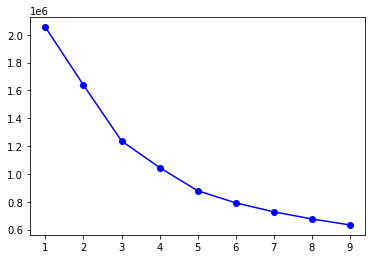

In [97]:
from sklearn.cluster import KMeans

k = [KMeans(n_clusters=i,random_state=42).fit(b_scaled) for i in range(1,10)]
    
kmeans_per_k = k[1:]
inertia = [i.inertia_ for i in k]
plt.plot(range(1,10),inertia,'bo-')

In [98]:
k = 4
clstr = KMeans(n_clusters=k)
y_pred = clstr.fit_predict(b_scaled)
clstr.cluster_centers_

df_mod1 = pd.DataFrame(b_scaled,columns=b.columns)
df_mod1['clusters'] = clstr.labels_


In [99]:
df_mod1.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier,clusters
0,0.045227,-0.098674,0.281493,-0.045227,-0.642206,0.61175,-0.448601,-0.752937,-1.006144,-0.005446,3
1,-0.023763,-0.101233,-1.227389,0.023763,-0.642206,0.61175,-0.448601,-0.752937,1.221677,-0.005446,0
2,0.183207,-0.098674,1.035933,-0.183207,0.751608,0.61175,-0.477915,-0.752937,0.107766,-0.005446,1
3,-0.265227,-0.154132,1.035933,0.265227,0.751608,0.61175,-0.477915,1.558860,1.221677,1.117295,0
4,0.045227,-0.124270,1.035933,-0.045227,0.751608,0.61175,-0.477915,0.402962,0.107766,1.117295,0


In [100]:
c

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier
0,2016,1100000,2020,7,2238,317,2790,1,1,2
1,2014,1070000,2018,9,2238,317,2790,1,3,2
2,2020,1100000,2021,3,4081,317,2733,1,2,2
3,2007,450000,2021,16,4081,317,2733,3,3,3
4,2016,800000,2021,7,4081,317,2733,2,2,3
...,...,...,...,...,...,...,...,...,...,...
205337,2017,2000000,2019,6,3873,290,5084,1,1,1
205338,2013,500000,2017,10,2994,92,823,1,1,3
205339,2018,1000000,2021,5,1956,174,2475,1,1,1
205340,2012,35000,2015,11,159,9,136,1,1,3


In [101]:
df_mod1[df_mod1['designation']<20]

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier,clusters
0,0.045227,-0.098674,0.281493,-0.045227,-0.642206,0.611750,-0.448601,-0.752937,-1.006144,-0.005446,3
1,-0.023763,-0.101233,-1.227389,0.023763,-0.642206,0.611750,-0.448601,-0.752937,1.221677,-0.005446,0
2,0.183207,-0.098674,1.035933,-0.183207,0.751608,0.611750,-0.477915,-0.752937,0.107766,-0.005446,1
3,-0.265227,-0.154132,1.035933,0.265227,0.751608,0.611750,-0.477915,1.558860,1.221677,1.117295,0
4,0.045227,-0.124270,1.035933,-0.045227,0.751608,0.611750,-0.477915,0.402962,0.107766,1.117295,0
...,...,...,...,...,...,...,...,...,...,...,...
205337,0.079722,-0.021886,-0.472948,-0.079722,0.594303,-0.166836,0.731133,-0.752937,-1.006144,-1.128186,1
205338,-0.058258,-0.149866,-1.981830,0.058258,-0.070462,-5.876467,-1.460169,-0.752937,-1.006144,1.117295,3
205339,0.114217,-0.107206,1.035933,-0.114217,-0.855475,-3.511872,-0.610596,-0.752937,-1.006144,-1.128186,3
205340,-0.092753,-0.189540,-3.490712,0.092753,-2.214500,-8.269898,-1.813472,-0.752937,-1.006144,1.117295,3


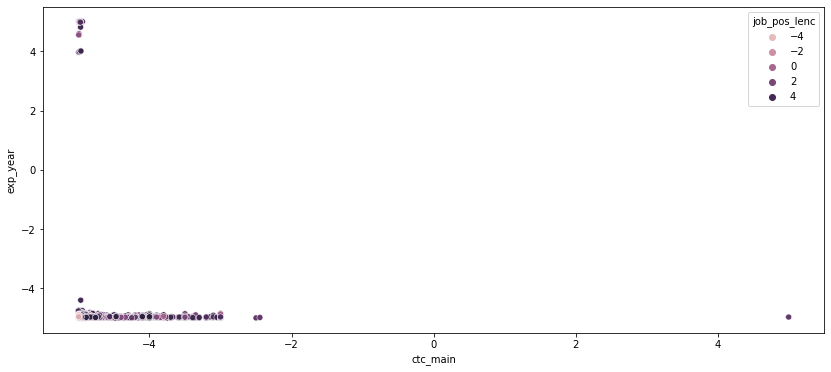

In [102]:
from sklearn.preprocessing import MinMaxScaler


mmsc  = MinMaxScaler(feature_range=(-5, 5))

mmsc.fit_transform(c)
plt.figure(figsize=(14,6))
sns.scatterplot(pd.DataFrame(mmsc.fit_transform(c),columns=c.columns)['ctc_main'],
pd.DataFrame(mmsc.fit_transform(c),columns=c.columns)['exp_year'],
hue=pd.DataFrame(mmsc.fit_transform(c),columns=c.columns)['job_pos_lenc'])
plt.show()

In [103]:
# plt.ticklabel_format(useOffset=True,style='plain',axis='X')
pd.options.display.float_format='{:.2f}'.format
c.describe()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier
count,205342.00,205342.00,205342.00,205342.00,205342.00,205342.00,205342.00,205342.00,205342.00,205342.00
mean,2014.69,2256518.08,2019.63,8.31,3087.17,295.79,3662.31,1.65,1.90,2.00
std,28.99,11720635.92,1.33,28.99,1322.27,34.68,1944.51,0.87,0.90,0.89
min,0.00,2.00,2015.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2013.00,530000.00,2019.00,5.00,2133.00,276.00,1964.00,1.00,1.00,1.00
50%,2016.00,950000.00,2020.00,7.00,3372.00,285.00,3884.00,1.00,2.00,2.00
75%,2018.00,1700000.00,2021.00,10.00,4186.00,317.00,5339.00,3.00,3.00,3.00
max,2022.00,1000150000.00,2021.00,2023.00,5495.00,400.00,7445.00,3.00,3.00,3.00


In [104]:
# OUTLIER REMOVER 

import numpy as np
from scipy import stats
c = c[(np.abs(stats.zscore(c)) < 3).all(axis=1)]
c.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier
0,2016,1100000,2020,7,2238,317,2790,1,1,2
1,2014,1070000,2018,9,2238,317,2790,1,3,2
2,2020,1100000,2021,3,4081,317,2733,1,2,2
3,2007,450000,2021,16,4081,317,2733,3,3,3
4,2016,800000,2021,7,4081,317,2733,2,2,3


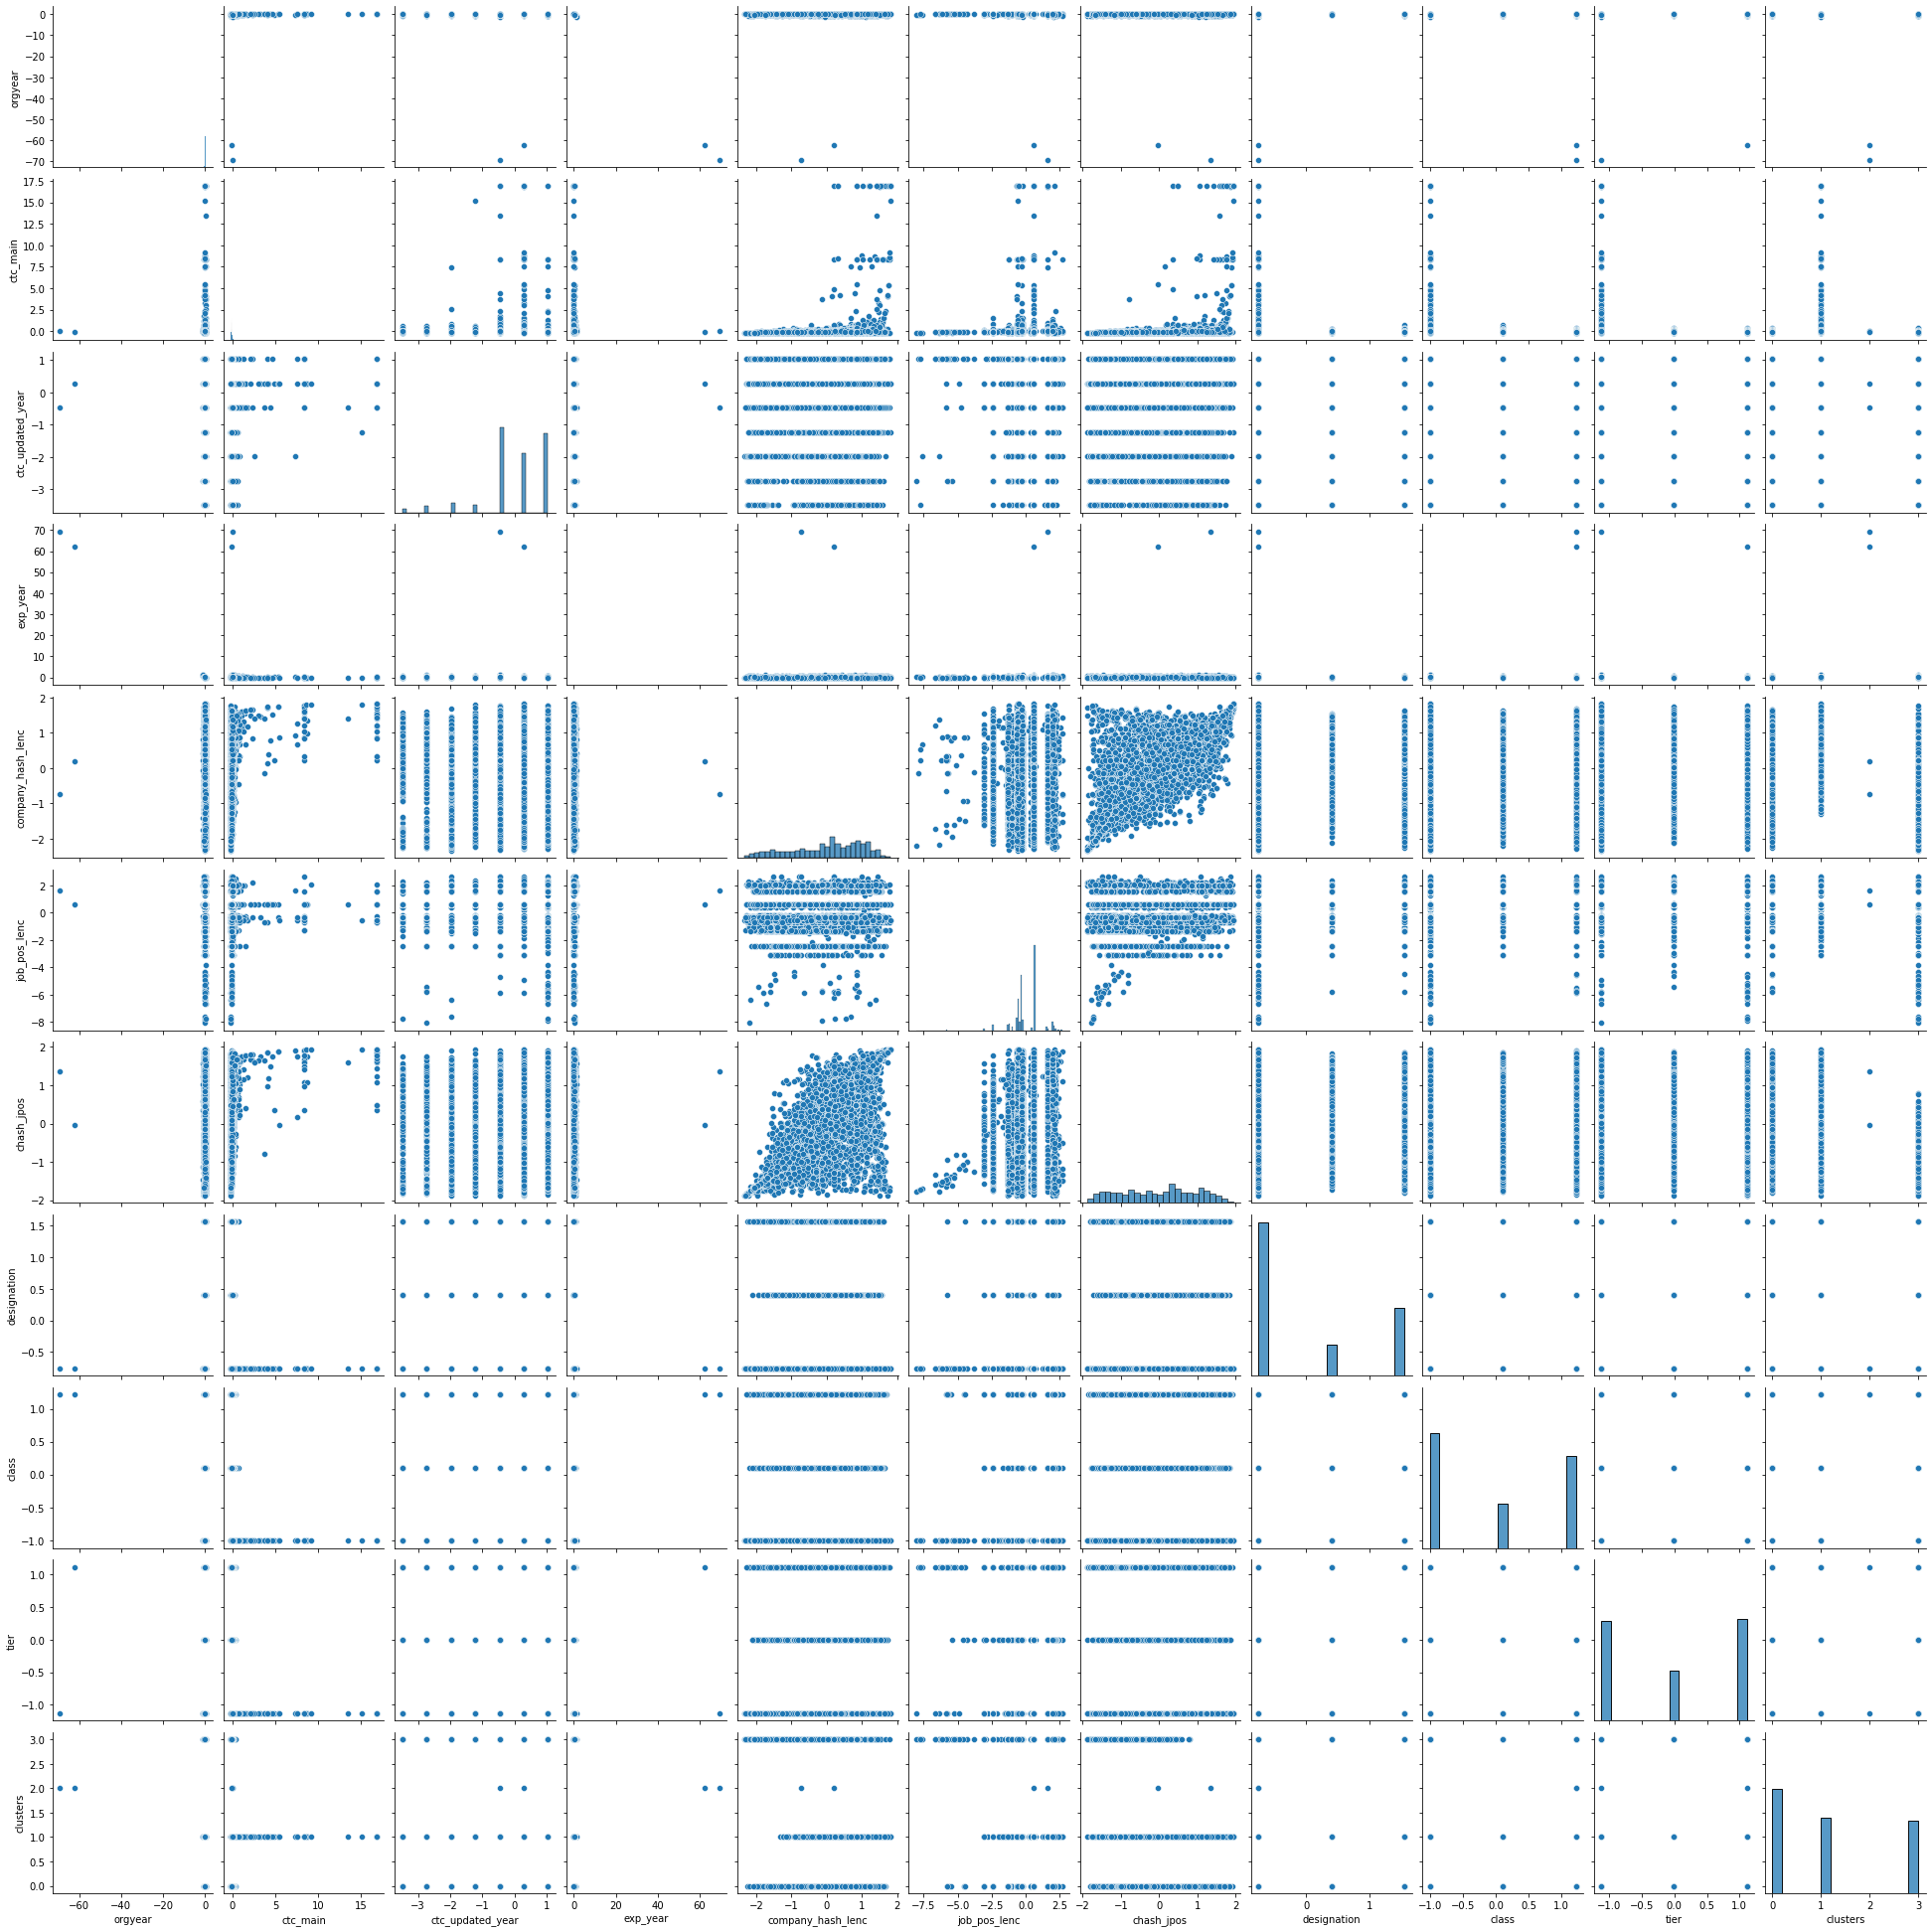

In [105]:
sns.pairplot(df_mod1.sample(10000))

### FIG : Pairplot of 10000 data from df_mod
---

In [106]:
df_mod1.head()

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier,clusters
0,0.05,-0.10,0.28,-0.05,-0.64,0.61,-0.45,-0.75,-1.01,-0.01,3
1,-0.02,-0.10,-1.23,0.02,-0.64,0.61,-0.45,-0.75,1.22,-0.01,0
2,0.18,-0.10,1.04,-0.18,0.75,0.61,-0.48,-0.75,0.11,-0.01,1
3,-0.27,-0.15,1.04,0.27,0.75,0.61,-0.48,1.56,1.22,1.12,0
4,0.05,-0.12,1.04,-0.05,0.75,0.61,-0.48,0.40,0.11,1.12,0


---

## Dbscan Clustering 
---

In [107]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.9, min_samples=12)
z = db.fit(b_scaled.sample(29000))


# df_mod2 = pd.DataFrame(b_scaled,columns=b.columns)
# df_mod2['clusters'] = clstr.labels_
pd.Series(z.labels_).value_counts()

 7     5674
 4     4543
 2     4510
-1     1960
 12    1635
       ... 
 70      12
 68      12
 71      12
 66      12
 65      10
Length: 73, dtype: int64

In [108]:
df_mod2 = pd.DataFrame(b_scaled.sample(29000),columns=b.columns)
df_mod2['clusters'] = z.labels_

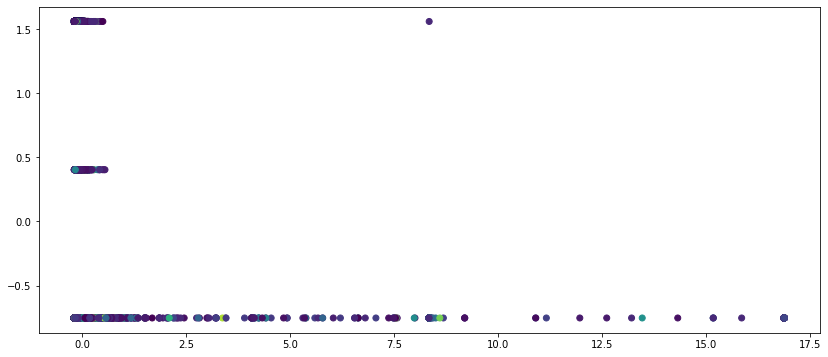

In [109]:
plt.figure(figsize=(14,6))
plt.scatter(df_mod2['ctc_main'],df_mod2['designation'],c=df_mod2['clusters'])
# plt.scatter(z.cluster_centers_[:,0],z.cluster_centers_[:,1],color='red',marker='X',s=100)
plt.show()

In [110]:
df_mod2

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier,clusters
33724,-0.02,-0.16,1.04,0.02,-1.49,0.61,-1.23,-0.75,1.22,1.12,0
91024,0.08,-0.16,1.04,-0.08,-0.10,-0.31,-0.95,0.40,1.22,1.12,1
9894,0.15,-0.15,-0.47,-0.15,-0.13,0.61,0.38,0.40,0.11,-0.01,2
136801,0.01,-0.15,1.04,-0.01,0.22,-0.57,-1.29,1.56,0.11,-0.01,2
33640,-0.13,0.04,0.28,0.13,-0.39,0.61,-0.21,-0.75,-1.01,-1.13,3
...,...,...,...,...,...,...,...,...,...,...,...
8108,0.08,-0.09,1.04,-0.08,-0.13,0.61,0.38,-0.75,-1.01,-1.13,7
64677,-0.02,-0.16,0.28,0.02,-1.94,0.61,-1.61,-0.75,-1.01,-1.13,11
166675,0.15,-0.16,-0.47,-0.15,-0.13,-0.20,1.13,0.40,1.22,1.12,32
156355,-0.27,0.18,1.04,0.27,0.83,1.97,0.91,-0.75,-1.01,-1.13,10


In [111]:
from sklearn.preprocessing import MinMaxScaler


mmsc  = MinMaxScaler(feature_range=(-5, 5))

min_maxC = mmsc.fit_transform(c)
min_maxC  = pd.DataFrame(mmsc.fit_transform(c),columns=c.columns)


In [112]:
db = DBSCAN(eps=0.9, min_samples=12)
z = db.fit(min_maxC.sample(29000))

pd.Series(z.labels_).value_counts()

df_mod2 = pd.DataFrame(b_scaled.sample(29000),columns=b.columns)
df_mod2['clusters'] = z.labels_

In [113]:
df_mod2

,orgyear,ctc_main,ctc_updated_year,exp_year,company_hash_lenc,job_pos_lenc,chash_jpos,designation,class,tier,clusters
144905,0.05,-0.09,1.04,-0.05,0.11,-0.57,-0.61,-0.75,-1.01,1.12,-1
38216,0.18,-0.14,1.04,-0.18,0.10,0.61,-0.98,-0.75,0.11,1.12,-1
24558,-0.09,0.03,0.28,0.09,0.39,0.61,0.39,-0.75,-1.01,-1.13,0
102358,0.05,-0.06,-0.47,-0.05,-1.42,-0.31,-0.85,-0.75,-1.01,-1.13,20
63549,-0.27,-0.00,-0.47,0.27,0.78,0.61,0.86,-0.75,1.22,1.12,1
...,...,...,...,...,...,...,...,...,...,...,...
123752,0.05,-0.06,0.28,-0.05,-0.02,-1.26,-0.27,-0.75,1.22,-0.01,-1
7803,0.11,-0.16,1.04,-0.11,-0.13,0.61,0.38,0.40,1.22,1.12,-1
137389,0.08,-0.12,0.28,-0.08,0.76,-0.57,0.05,1.56,1.22,1.12,-1
145522,0.11,-0.07,-0.47,-0.11,0.78,-0.57,0.79,1.56,1.22,1.12,7


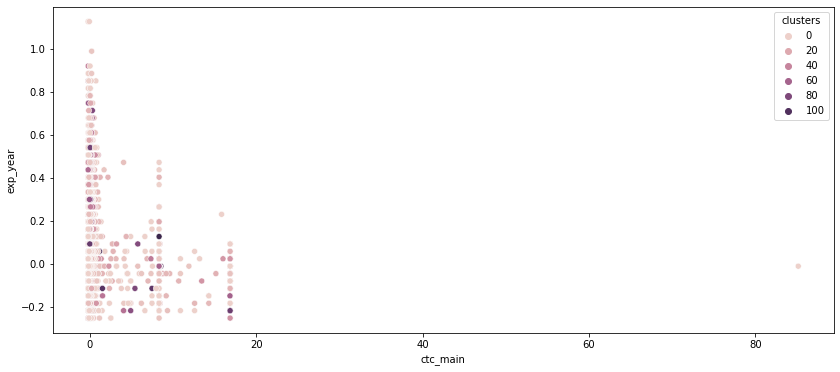

In [114]:
plt.figure(figsize=(14,6))
sns.scatterplot(df_mod2.ctc_main,df_mod2[df_mod2.exp_year<20]['exp_year'],hue=df_mod2.clusters)
plt.show()

In [115]:
df_mod2.groupby('clusters').mean().reset_index()


polar = df_mod2.groupby('clusters').mean().reset_index()
polar = pd.melt(polar,id_vars=['clusters'])




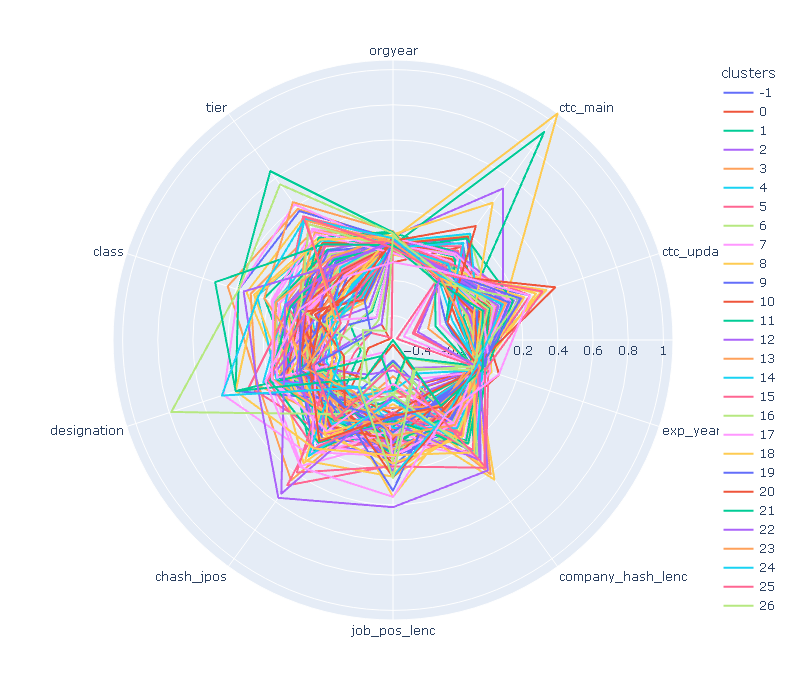

In [116]:
import plotly.express as px
fig = px.line_polar(polar,r='value',theta='variable',color='clusters',line_close=True,height=700,width=800)
fig.write_image('image.png')
from IPython.display import Image
Image('image.png')

In [118]:
train_data = b_scaled.drop(['clusters'],axis=1).sample(30000)

---

## Agglomorative clustering
---

In [121]:
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot


agg_mdl = AgglomerativeClustering(n_clusters=4)

# each data point assigned to cluster
agg_result = agg_mdl.fit_predict(train_data)



In [122]:
pd.Series(agg_result).value_counts()

2    11190
0     9834
1     8969
3        7
dtype: int64

In [123]:
train_data1 = pd.DataFrame(train_data,columns=train_data.columns)
train_data1['clusters'] = agg_result

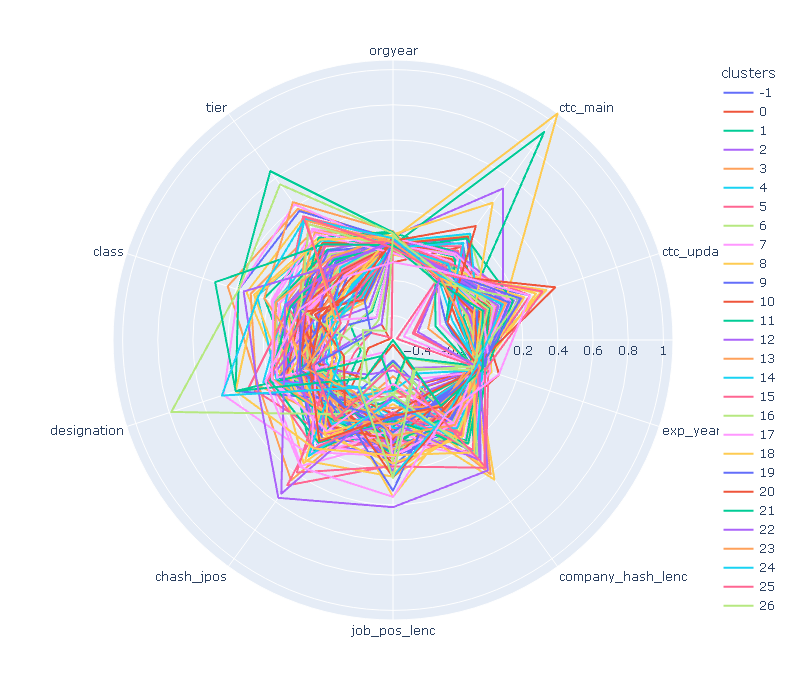

In [124]:
import plotly.express as px
fig = px.line_polar(polar,r='value',theta='variable',color='clusters',line_close=True,height=700,width=800)
fig.write_image('image.png')
from IPython.display import Image
Image('image.png')

---
## Top 2 job positions on every companies on the basis of ctc.
---

In [126]:
top2jobp = df1.groupby('company_hash').apply(lambda x: x.sort_values(
    by='ctc', ascending=False).head(2).reset_index(drop=True))

In [127]:
top2job_pos_ = top2jobp['job_position'].reset_index()[2:]

In [128]:
top2job_pos_.head(50)

,company_hash,level_1,job_position
2,a,0,product manager
3,a b onttr wgqu,0,other
4,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,0,other
5,a ntwy ogrhnxgzo ucn rna,0,assistant
6,a ntwy ogrhnxgzo ucn rna,1,other
7,a ntwyzgrgsxto,0,other
8,a ntwyzgrgsxto,1,other
9,a onvq ntwyzgrgsxto,0,engineering leadership
10,a rgsxw ucn rna,0,other
11,a t oyvf ogenfvqt xzaxv ucn rna,0,engineering leadership


In [129]:
top2job_pos_.job_position.value_counts().head(10)

other                     14572
backend engineer           8149
fullstack engineer         6604
frontend engineer          3259
engineering leadership     2893
android engineer           2659
data scientist             1990
qa engineer                1780
ios engineer               1368
devops engineer            1274
Name: job_position, dtype: int64

---
---
---

# INSIGHTS:


### OBSERVATIONS 1:



- Observations are made on the basis of ***ctc***.



- Top most user with email hash ***29a71dd13adf6d2d497571a565bb3096cf66cb46cd1eceeefa83817ecd4f1371*** earns a total of 100cr which is nearly 3x of other top 9 users.


- From th mentoned job position Fullstack Engineer seems to be the top most job position.



- From the mentioned job positions in top 10 earning users FullStack Engineer seems to be most frequent.

----





### OBSERVATION 2:


- Observations are made on the basis of ***ctc***.



-  From top 15 job positions ***Data Analyst*** seems to be the most appeared role with 16.6% followed by ***support engineer*** 15.5% , ***backend engineer*** 15.2% and ***fullstack engineer*** 13.4%.


-  Top 6 most occuring job positions comprise 75% of the total data.




----



### OBSERVATION 3 :


- Observations are made on the basis of ***ctc***.


- ***nvnv wgzohrnvzwj otqcxwto*** is the most occuring company in top 15 top companies with total of 21.3%  and it is followed by ***vwwtznhqt*** 9.2% , ***fxuqg rxbxnta*** 8.5% and ***xzegojo*** 8.5%.



-  Top 6 companies comprise of total 60% of the overall data.




----


### OBSERVATION 4:



- Median experience years comes out to be 15 after removing the outliers.



- Quartile 1 comes out to be nearly 9.



- Quartile 3 comes out to be nearly 21.



---




### OBSERVATIONS 5:


- All the observations are made on the basis of counts.



- Most frequently occuring job positions excluding ***others*** comes out to be ***backend engineer*** followed by ***fullstack engineer***, ***frontend engineer***, ***engineering leadership***.



- Among top 20 occuring job positions non-coding domain is the least occuring domain of all.


----




### OBSERVATIONS 6:



- According to 95% confidence interval, most prcentage of probability in experience year seems to be 7.3 years.



- According to 95% confidence interval, most prcentage of probability in ctc seems to be ₹ 1038000.

----


### OBSERVATIONS 7:


- Above 20000 users have 5 years of experience which is most of all.



- Users having 1 years of experience are the least occuring ones.



----


### OBSERVATION 8:



- From ***cluster 0*** we can notice that with the increase of exp_years ctc_main , company_hash and job_position also increased without the increase of update year. Means top class users directly switched with a high salary hike.






- From ***cluster 1*** we can notice that users that joined at high org_year i.e. recently(2020 for example)  have low experience years , ctc and are joined in poor company as well, So they are the ***potential targets*** of scaler as they can be upskilled to higher salary levels or average salary levels.






- From ***cluster 2*** we can observe that users that joined at high org_year i.e. recently(2020 for example)  have low experience years and average ctc with fairly good job_position and company, they can also be the ***right target*** for scaler as they also need to be upskilled to reach the top tier salary levels.


----





---
# RECOMMENDATIONS:

---


***Recommendations were taken from polar plot 1*** 



- Cluster 1 users joined at high org_year i.e. recently(2020 for example) have low experience years , ctc and are joined in poor company as well, So they are the potential targets of scaler as they can be upskilled to higher salary levels or average salary levels.




- Cluster 2 users  joined at high org_year i.e. recently(2020 for example) have low experience years and average ctc with fairly good job_position and company, they can also be the right target for scaler as they also need to be upskilled to reach the top tier salary levels.

***Recommendations were taken from tiers, designation and classes*** 


- According to tier, designation and classes users that falls into  tier 3 can be potential target for scaler as they can be upskilled to tier 1 and tier 2.


- Tier 2 users can also be targeted with with some advanced curricullum as they also can be upskilled to tier 1.

---
---